In [8]:
#import libaries

#import libraries
import os
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.dates as mdates 
xformatter = mdates.DateFormatter('%H:%M') # for time axis plots

import sklearn
from scipy.optimize import curve_fit
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import joblib
from sklearn.pipeline import Pipeline
from numpy.random import seed
import tensorflow
#from tensorflow import set_random_seed
import tensorflow as tf
#tf.logging.set_verbosity(tf.logging.ERROR)


from keras.layers import Input, Dropout, Dense, LSTM, TimeDistributed, RepeatVector
from keras.models import Model
from keras import regularizers

import warnings
warnings.filterwarnings('ignore')
import warnings
warnings.filterwarnings('ignore')
import time
from subprocess import check_output
#import warnings library
import warnings
# ignore all warnings
warnings.filterwarnings('ignore')
# Any results you write to the current directory are saved as output.




In [5]:
pip install joblib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [9]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [15]:
df=pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/Project_vibra.csv')
df.head()

,date,GENERATOR POWER,IDF B FR BRG T EMP.1,IDF B FR BRG T EMP.2,IDF B FR BRG T EMP.3,IDF B MID BRG TEMP.1,IDF B MID BRG TEMP.2,IDF B MID BRG TEMP.3,IDF B BKR BRG TEMP.1,IDF B BKR BRG TEMP.2,...,IDF B MOT WDG TEMP.3,IDF B MOT WDG TEMP.4,IDF B MOT WDG TEMP.5,IDF B MOT WDG TEMP.6,Lube oil tank temp.,Current lube oil pump A,Current lube oil pump B,IDF B INL FG TEMP.,IDF B INL FG P,ID FAN B MTR ACT FB
0,2018-03-01 0:00,-1.33,45.60,46.39,46.81,49.00,49.37,49.32,47.05,48.75,...,57.50,58.33,55.57,57.52,34.95,0.0,1.86,39.45,-1.13,17.98
1,2018-03-01 1:00,-1.38,45.22,46.01,46.38,48.75,49.13,49.09,46.86,48.52,...,56.53,57.32,54.62,56.53,34.62,0.0,1.85,47.88,-1.18,16.18
2,2018-03-01 2:00,-1.33,45.33,46.10,46.58,48.21,48.66,48.68,46.27,48.03,...,55.45,56.22,53.58,55.44,34.21,0.0,1.87,56.12,-1.24,19.79
3,2018-03-01 3:00,-1.38,45.71,46.55,46.89,48.00,48.47,48.50,45.99,47.79,...,54.69,55.48,52.86,54.70,34.00,0.0,1.87,59.75,-1.36,22.26
4,2018-03-01 4:00,-1.25,45.80,46.64,47.04,47.82,48.34,48.39,45.83,47.65,...,54.24,55.02,52.43,54.25,33.97,0.0,1.83,61.03,-1.31,20.36


# New section

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2928 entries, 0 to 2927
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   date                      2928 non-null   object 
 1   GENERATOR POWER           2928 non-null   float64
 2   IDF B FR BRG T EMP.1      2928 non-null   float64
 3   IDF B FR BRG T EMP.2      2928 non-null   float64
 4   IDF B FR BRG T EMP.3      2928 non-null   float64
 5   IDF B MID BRG TEMP.1      2928 non-null   float64
 6   IDF B MID BRG TEMP.2      2928 non-null   float64
 7   IDF B MID BRG TEMP.3      2928 non-null   float64
 8   IDF B BKR BRG TEMP.1      2928 non-null   object 
 9   IDF B BKR BRG TEMP.2      2928 non-null   float64
 10  IDF B BKR BRG TEMP.3      2928 non-null   float64
 11  IDF B MOT CUR             2928 non-null   float64
 12  IDF vibration X           2928 non-null   float64
 13  IDF vibration Y           2928 non-null   float64
 14  IDF B MO

In [12]:
df.columns

Index(['date', 'GENERATOR POWER', 'IDF B FR BRG T EMP.1',
       'IDF B FR BRG T EMP.2', 'IDF B FR BRG T EMP.3', 'IDF B MID BRG TEMP.1',
       'IDF B MID BRG TEMP.2', 'IDF B MID BRG TEMP.3', 'IDF B BKR BRG TEMP.1',
       'IDF B BKR BRG TEMP.2', 'IDF B BKR BRG TEMP.3', 'IDF B MOT CUR',
       'IDF vibration X', 'IDF vibration Y', 'IDF B MOTOR FR BRG TEMP.',
       'IDF B MOTOR BRG TEMP.', 'IDF B MOT WDG TEMP.1', 'IDF B MOT WDG TEMP.2',
       'IDF B MOT WDG TEMP.3', 'IDF B MOT WDG TEMP.4', 'IDF B MOT WDG TEMP.5',
       'IDF B MOT WDG TEMP.6', 'Lube oil tank temp.',
       'Current lube oil pump A', 'Current lube oil pump B',
       'IDF B INL FG    TEMP.', 'IDF B INL FG P', 'ID FAN B MTR    ACT FB'],
      dtype='object')

In [13]:
a = list(df.columns)
a.remove ('date')

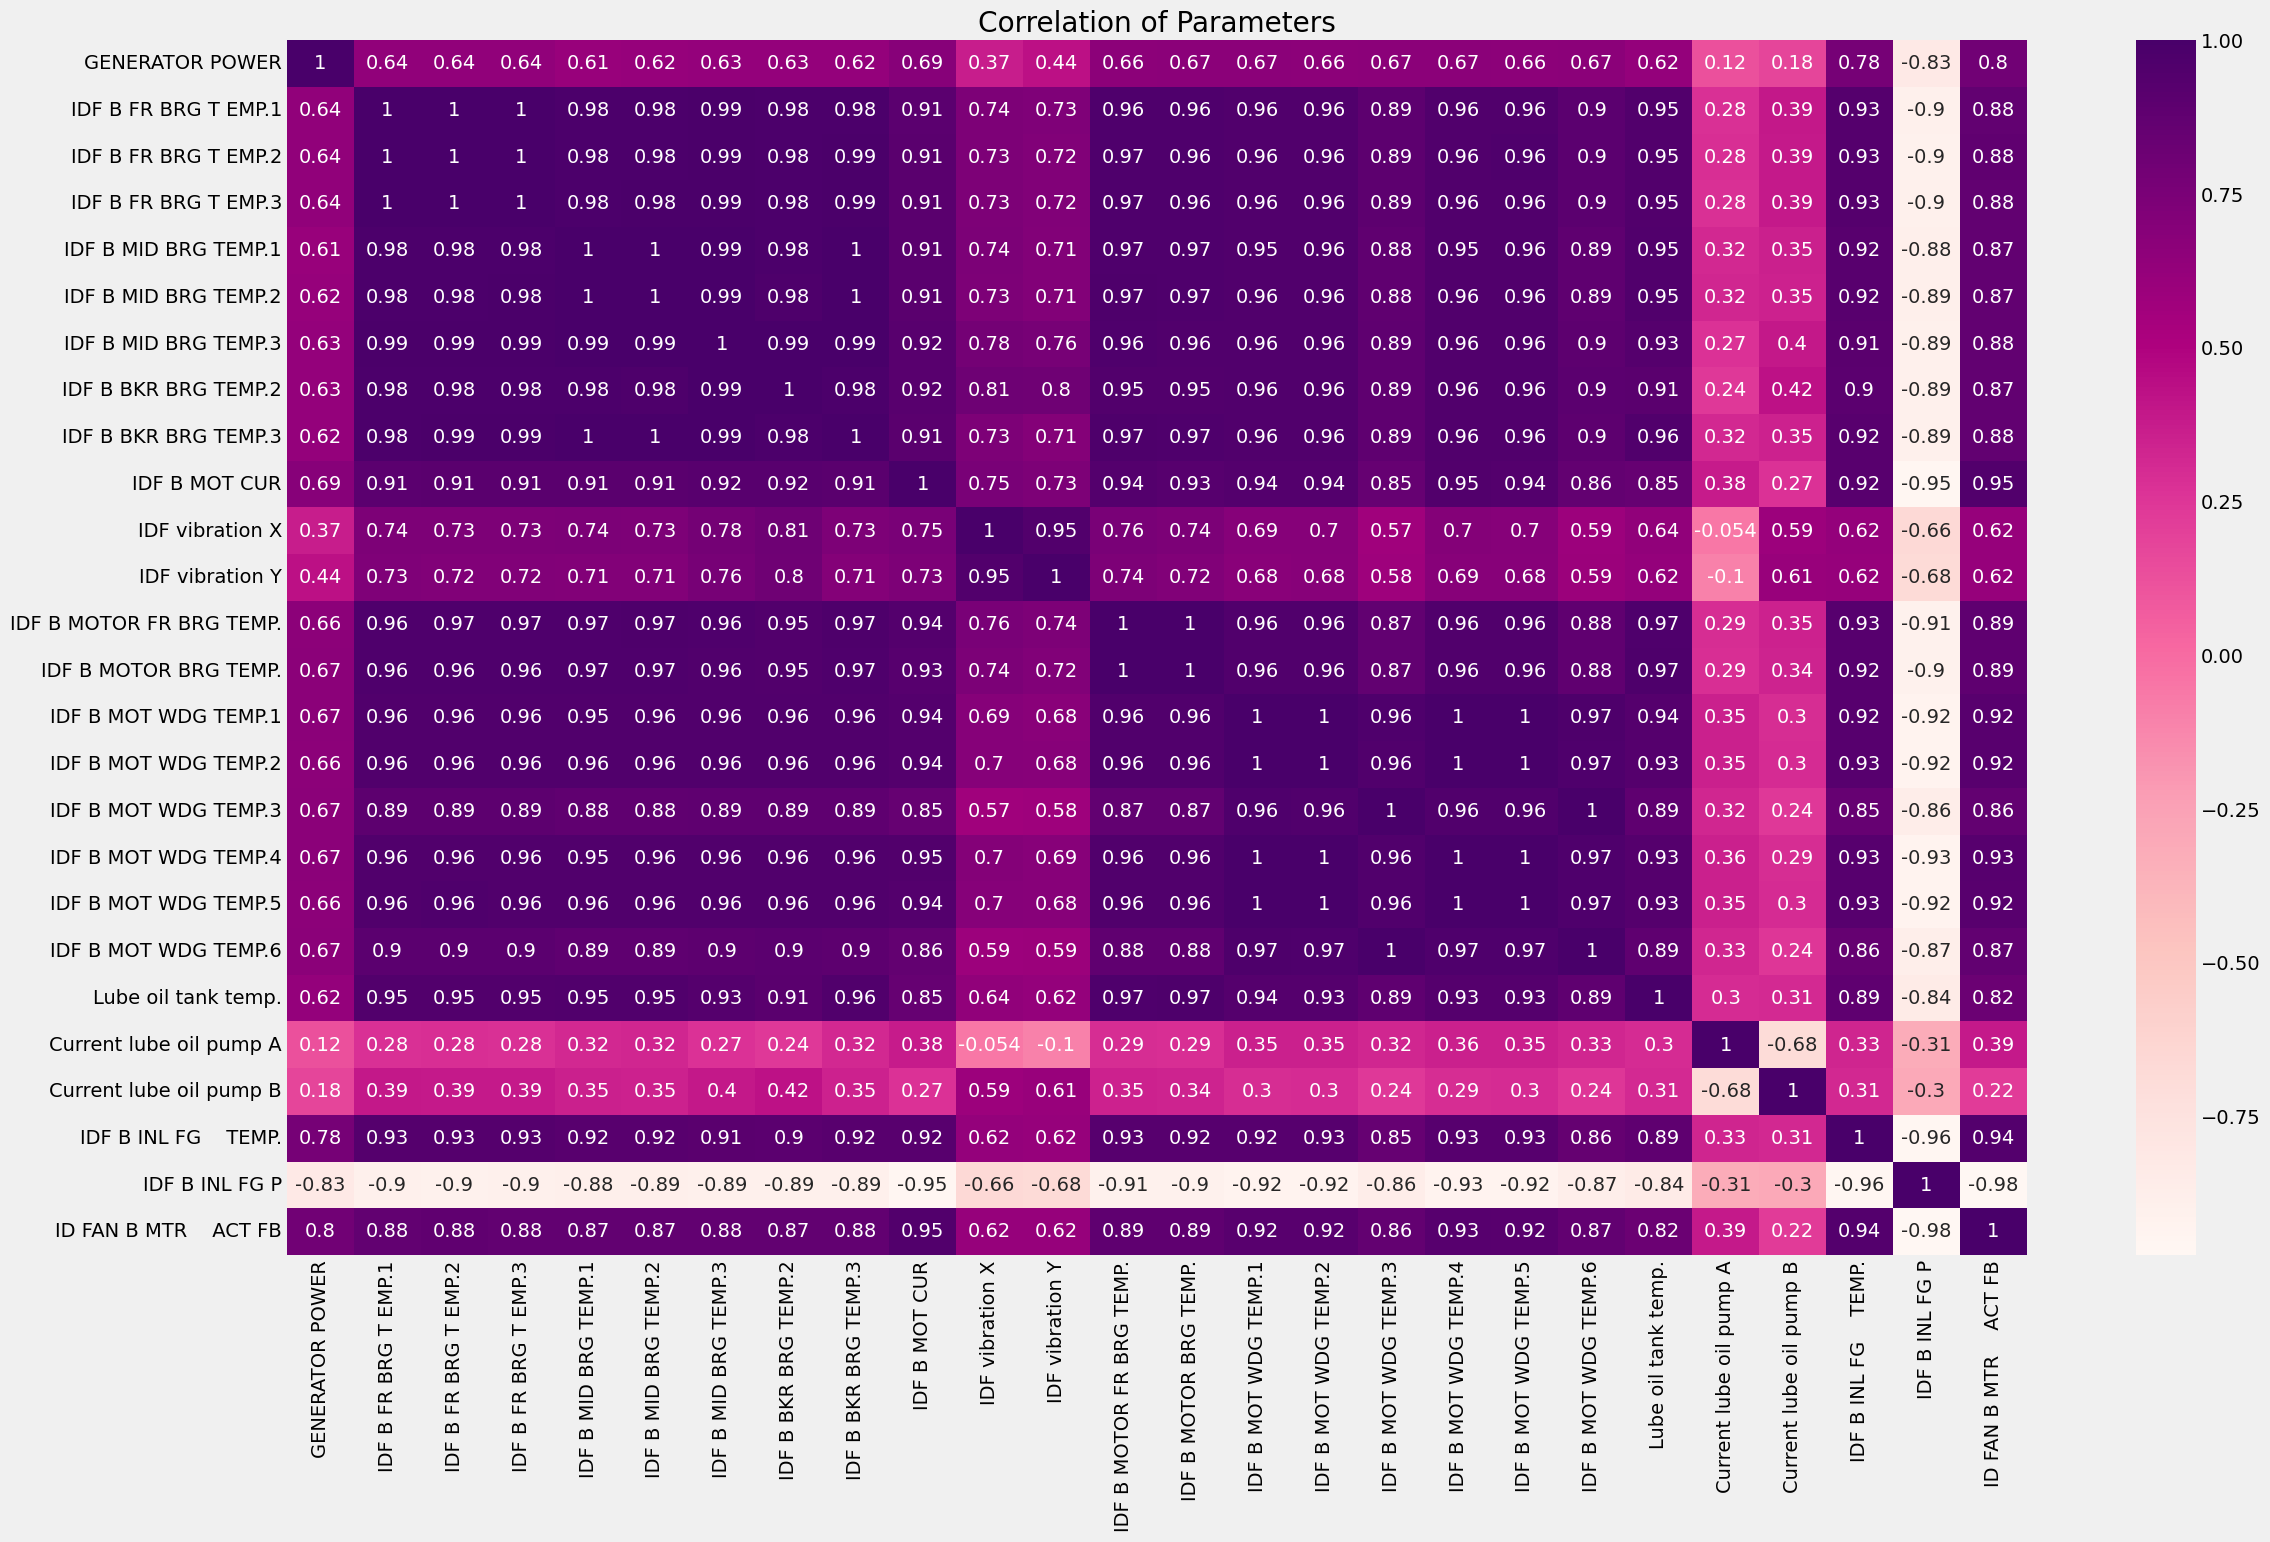

In [14]:
#Here the correlations of parameters are drawn 

corrMatrix = df[a].corr()
plt.figure(figsize=(25,15))
fig_corr = sns.heatmap(corrMatrix,cmap="RdPu", annot=True)
plt.title("Correlation of Parameters")
plt.show()

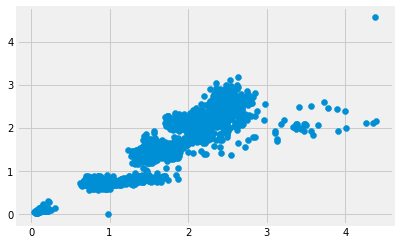

In [ ]:
plt.scatter(df['IDF vibration X'],df['IDF vibration Y'])
plt.show()

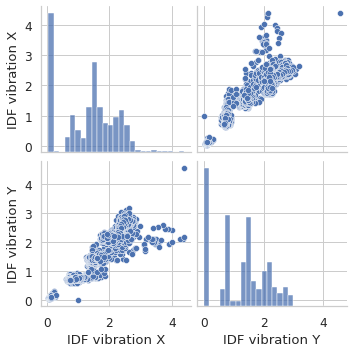

In [ ]:
sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [15, 5]})
cols_pair = ["IDF vibration X","IDF vibration Y"]
fig_pair = sns.pairplot(df[cols_pair])
plt.show()

In [ ]:
DATA = df['date']= pd.to_datetime(df['date'],format = '%Y-%m-%d %H:%M:%S')
df.index = DATA

In [ ]:
fig = px.scatter(df, x="date", y="IDF vibration X", title="Vibration x magnitude Distribution")
fig.update_traces(marker=dict(size=3, opacity=1), selector=dict(mode='markers'))
fig.show()

In [ ]:
fig = px.scatter(df, x="date", y="IDF vibration Y", title="Vibration Y magnitude Distribution")
fig.update_traces(marker=dict(size=3, opacity=1), selector=dict(mode='markers'))
fig.show()

In [ ]:
fig = px.scatter(df, x="date", y="GENERATOR POWER", title="GENERATOR POWER Distribution")
fig.update_traces(marker=dict(size=3, opacity=1), selector=dict(mode='markers'))
fig.show()

In [ ]:
train = df['2018-03-06 01:00:00':'2018-03-23 22:00:00']
train = train[['date','IDF vibration X','IDF vibration Y']]
train.set_index('date',inplace=True)
test = df['2018-03-23 22:00:00':]
test = test[['date','IDF vibration X','IDF vibration Y']]
test.set_index('date',inplace=True)
print("Training dataset shape:", train.shape)
print("Test dataset shape:", test.shape)

Training dataset shape: (430, 2)
Test dataset shape: (2378, 2)


In [ ]:
train[['IDF vibration X']]

,IDF vibration X
date,
2018-03-06 01:00:00,1.68
2018-03-06 02:00:00,1.66
2018-03-06 03:00:00,1.63
2018-03-06 04:00:00,1.54
2018-03-06 05:00:00,1.58
...,...
2018-03-23 18:00:00,1.62
2018-03-23 19:00:00,1.54
2018-03-23 20:00:00,1.55


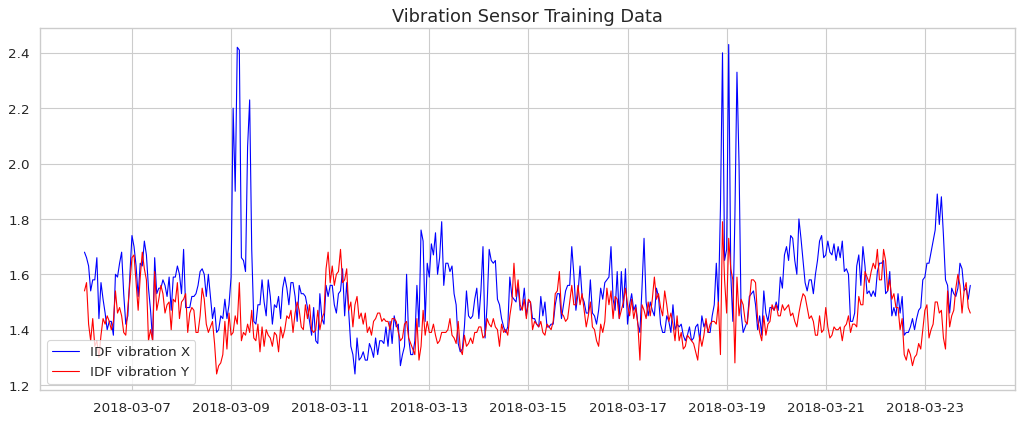

In [ ]:
fig, ax = plt.subplots(figsize=(14, 6), dpi=80)
ax.plot(train['IDF vibration X'], label='IDF vibration X', color='blue', animated = True, linewidth=1)
ax.plot(train['IDF vibration Y'], label='IDF vibration Y', color='red', animated = True, linewidth=1)
plt.legend(loc='lower left')
ax.set_title('Vibration Sensor Training Data', fontsize=16)
plt.show()

In [ ]:
# transforming data from the time domain to the frequency domain using fast Fourier transform
train_fft = np.fft.fft(train)
test_fft = np.fft.fft(test)

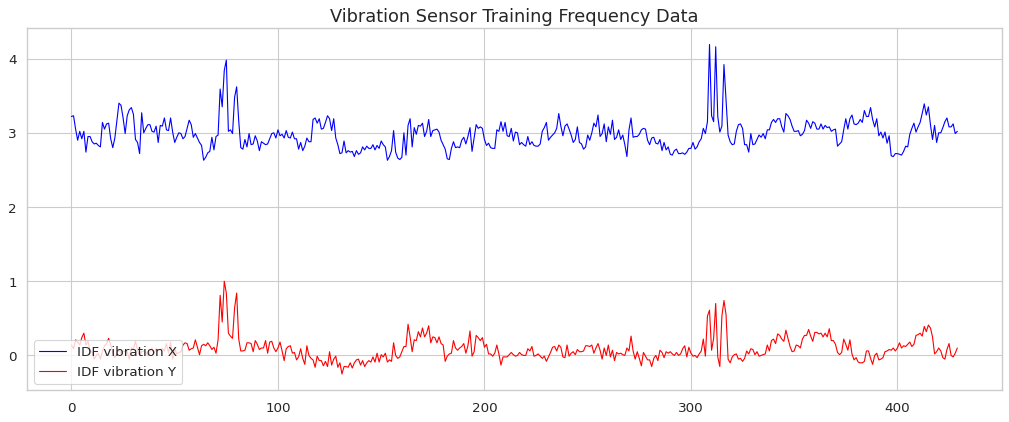

In [ ]:
# frequencies of the healthy sensor signal
fig, ax = plt.subplots(figsize=(14, 6), dpi=80)
ax.plot(train_fft[:,0].real, label='IDF vibration X', color='blue', animated = True, linewidth=1)
ax.plot(train_fft[:,1].real, label='IDF vibration Y', color='red', animated = True, linewidth=1)
plt.legend(loc='lower left')
ax.set_title('Vibration Sensor Training Frequency Data', fontsize=16)
plt.show()

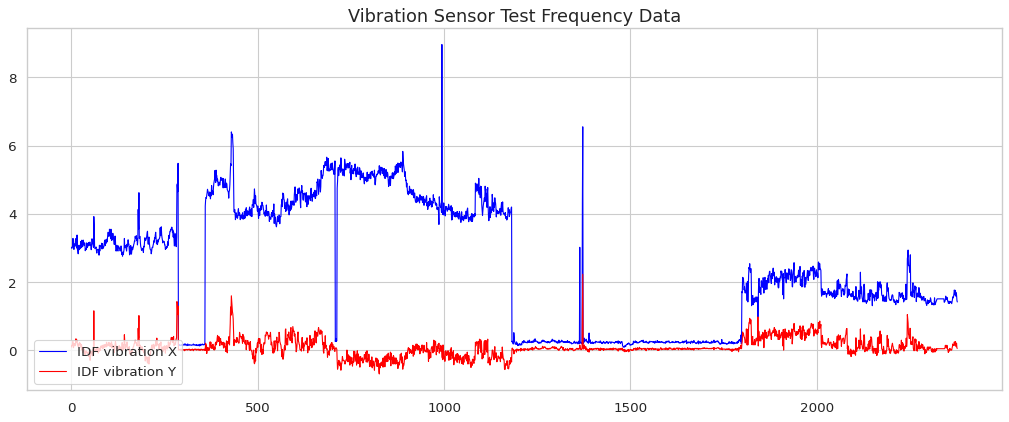

In [ ]:
# frequencies of the healthy sensor signal
fig, ax = plt.subplots(figsize=(14, 6), dpi=80)
ax.plot(test_fft[:,0].real, label='IDF vibration X', color='blue', animated = True, linewidth=1)
ax.plot(test_fft[:,1].real, label='IDF vibration Y', color='red', animated = True, linewidth=1)
plt.legend(loc='lower left')
ax.set_title('Vibration Sensor Test Frequency Data', fontsize=16)
plt.show()

In [ ]:
# normalize the data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(train)
X_test = scaler.transform(test)
scaler_filename = "scaler_data"
joblib.dump(scaler, scaler_filename)

['scaler_data']

In [ ]:
# reshape inputs for LSTM [samples, timesteps, features]
X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
print("Training data shape:", X_train.shape)
X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])
print("Test data shape:", X_test.shape)

Training data shape: (430, 1, 2)
Test data shape: (2378, 1, 2)


In [ ]:
# define the autoencoder network model
def autoencoder_model(X):
    inputs = Input(shape=(X.shape[1], X.shape[2]))
    L1 = LSTM(16, activation='relu', return_sequences=True, 
              kernel_regularizer=regularizers.l2(0.00))(inputs)
    L2 = LSTM(4, activation='relu', return_sequences=False)(L1)
    L3 = RepeatVector(X.shape[1])(L2)
    L4 = LSTM(4, activation='relu', return_sequences=True)(L3)
    L5 = LSTM(16, activation='relu', return_sequences=True)(L4)
    output = TimeDistributed(Dense(X.shape[2]))(L5)    
    model = Model(inputs=inputs, outputs=output)
    return model

In [ ]:
 #create the autoencoder model
model = autoencoder_model(X_train)
model.compile(optimizer='adam', loss='mae')
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 1, 2)]            0         
_________________________________________________________________
lstm (LSTM)                  (None, 1, 16)             1216      
_________________________________________________________________
lstm_1 (LSTM)                (None, 4)                 336       
_________________________________________________________________
repeat_vector (RepeatVector) (None, 1, 4)              0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 1, 4)              144       
_________________________________________________________________
lstm_3 (LSTM)                (None, 1, 16)             1344      
_________________________________________________________________
time_distributed (TimeDistri (None, 1, 2)              34    

In [ ]:
# fit the model to the data
nb_epochs = 200
batch_size = 10
history = model.fit(X_train, X_train, epochs=nb_epochs, batch_size=batch_size,validation_split=0.07).history

Epoch 1/200
40/40 [==============================] - 0s 8ms/step - loss: 0.1031 - val_loss: 0.1146
Epoch 2/200
40/40 [==============================] - 0s 7ms/step - loss: 0.1031 - val_loss: 0.1150
Epoch 3/200
40/40 [==============================] - 0s 7ms/step - loss: 0.1031 - val_loss: 0.1146
Epoch 4/200
40/40 [==============================] - 0s 7ms/step - loss: 0.1031 - val_loss: 0.1149
Epoch 5/200
40/40 [==============================] - 0s 6ms/step - loss: 0.1031 - val_loss: 0.1142
Epoch 6/200
40/40 [==============================] - 0s 6ms/step - loss: 0.1031 - val_loss: 0.1160
Epoch 7/200
40/40 [==============================] - 0s 8ms/step - loss: 0.1032 - val_loss: 0.1143
Epoch 8/200
40/40 [==============================] - 0s 9ms/step - loss: 0.1033 - val_loss: 0.1152
Epoch 9/200
40/40 [==============================] - 0s 7ms/step - loss: 0.1031 - val_loss: 0.1143
Epoch 10/200
40/40 [==============================] - 0s 7ms/step - loss: 0.1031 - val_loss: 0.1143
Epoch 11/

In [ ]:
plt.clf()

<Figure size 1080x360 with 0 Axes>

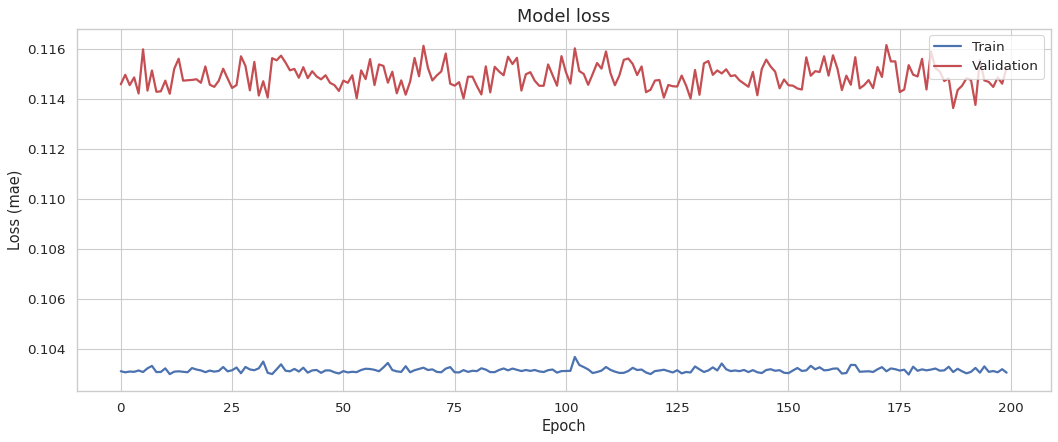

In [ ]:
# plot the training losses
fig, ax = plt.subplots(figsize=(14, 6), dpi=80)
ax.plot(history['loss'], 'b', label='Train', linewidth=2)
ax.plot(history['val_loss'], 'r', label='Validation', linewidth=2)
ax.set_title('Model loss', fontsize=16)
ax.set_ylabel('Loss (mae)')
ax.set_xlabel('Epoch')
ax.legend(loc='upper right')
plt.show()

(-0.05, 0.5)

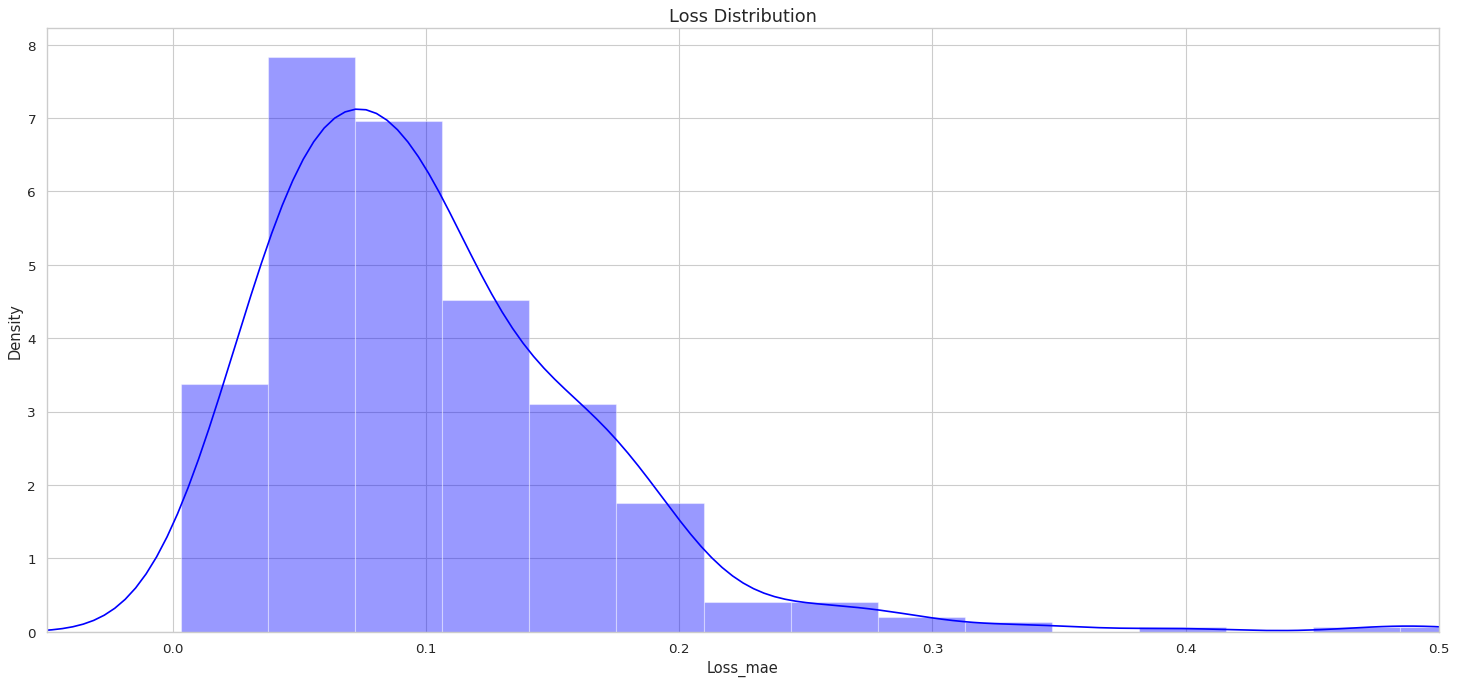

In [ ]:
# plot the loss distribution of the training set
X_pred = model.predict(X_train)
X_pred = X_pred.reshape(X_pred.shape[0], X_pred.shape[2])
X_pred = pd.DataFrame(X_pred, columns=train.columns)
X_pred.index = train.index

scored = pd.DataFrame(index=train.index)
Xtrain = X_train.reshape(X_train.shape[0], X_train.shape[2])
scored['Loss_mae'] = np.mean(np.abs(X_pred-Xtrain), axis = 1)
plt.figure(figsize=(20,10), dpi=80)
plt.title('Loss Distribution', fontsize=16)
sns.distplot(scored['Loss_mae'], bins = 20, kde= True, color = 'blue');
plt.xlim([-0.05,.5])

In [ ]:
# calculate the loss on the test set
X_pred = model.predict(X_test)
X_pred = X_pred.reshape(X_pred.shape[0], X_pred.shape[2])
X_pred = pd.DataFrame(X_pred, columns=test.columns)
X_pred.index = test.index

scored = pd.DataFrame(index=test.index)
Xtest = X_test.reshape(X_test.shape[0], X_test.shape[2])
scored['Loss_mae'] = np.mean(np.abs(X_pred-Xtest), axis = 1)
scored['Threshold'] = 1.8
scored['Anomaly'] = scored['Loss_mae'] > scored['Threshold']
scored

,Loss_mae,Threshold,Anomaly
date,,,
2018-03-23 22:00:00,0.038496,1.8,False
2018-03-23 23:00:00,0.040344,1.8,False
2018-03-24 00:00:00,0.028718,1.8,False
2018-03-24 01:00:00,0.083048,1.8,False
2018-03-24 02:00:00,0.172186,1.8,False
...,...,...,...
2018-06-30 19:00:00,0.938831,1.8,False
2018-06-30 20:00:00,0.847920,1.8,False
2018-06-30 21:00:00,0.912245,1.8,False


In [ ]:
 #calculate the same metrics for the training set 
# and merge all data in a single dataframe for plotting
X_pred_train = model.predict(X_train)
X_pred_train = X_pred_train.reshape(X_pred_train.shape[0], X_pred_train.shape[2])
X_pred_train = pd.DataFrame(X_pred_train, columns=train.columns)
X_pred_train.index = train.index

scored_train = pd.DataFrame(index=train.index)
scored_train['Loss_mae'] = np.mean(np.abs(X_pred_train-Xtrain), axis = 1)
scored_train['Threshold'] = 1.8
scored_train['Anomaly'] = scored_train['Loss_mae'] > scored_train['Threshold']
scored = pd.concat([scored_train, scored])

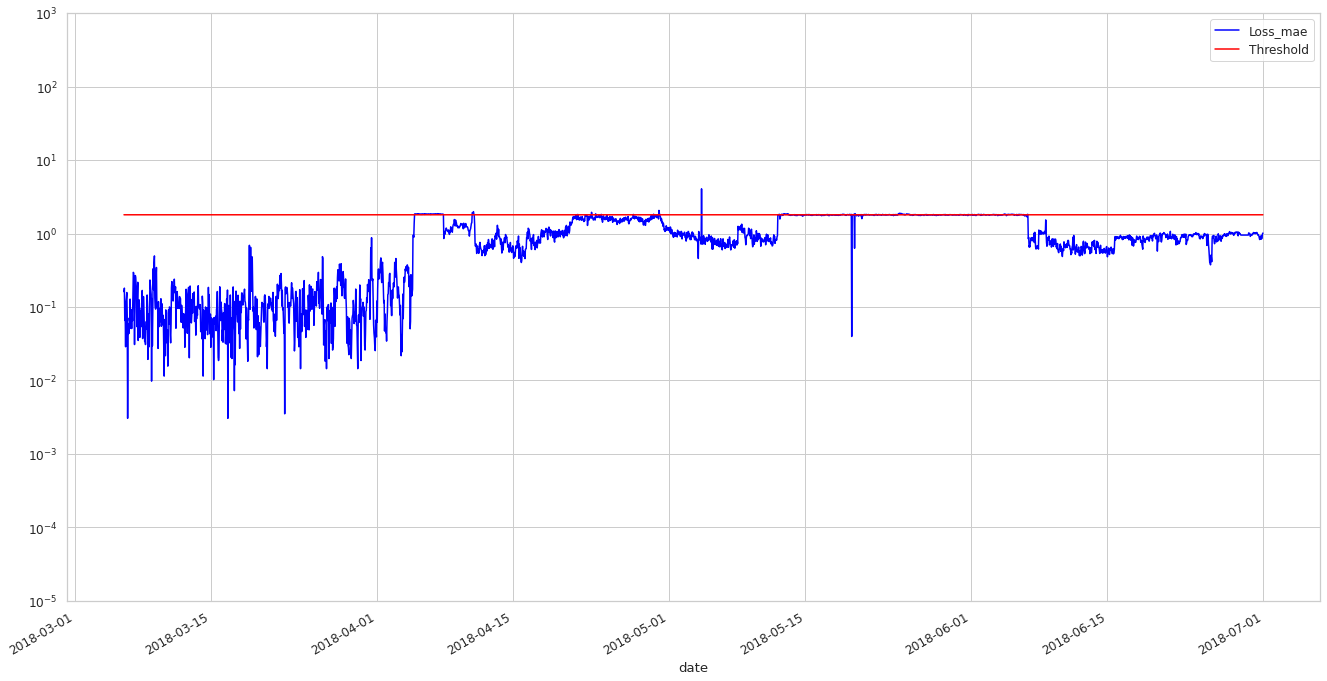

In [ ]:
# plot bearing failure time plot
scored.plot(logy=True,  figsize=(20,12), ylim=[1e-5,1e3], color=['blue','red'],)

In [ ]:
scored['Date'] = df.date

In [ ]:
#LINE sending result algorithm
import random
from random import randrange

def lineNotify(message):
    payload = {'message':message}
    return _lineNotify(payload)
def _lineNotify(payload,file=None):
    import requests
    url = 'https://notify-api.line.me/api/notify'
    token = 'XkKQUxACCN5crB8oj8ctmdcmcwM41CczLeYXQLVVp47'
    headers = {'Authorization':'Bearer '+token}
    return requests.post(url, headers=headers , data = payload, files=file)
for i in range (0,2) :
     randnum = random.randint(0,500)
     multiline_str = ('Operation' + '\nAnomaly : ' + str(scored['Anomaly'][randnum]) + '\nDatetime : ' + str(scored['Date'][randnum]))
     lineNotify(multiline_str)


